In [ ]:
import pandas as pd
import os

# Define base data directory
RAW_DATA_DIR = os.path.abspath("../../data/raw")

# Load datasets
ndt = pd.read_csv(os.path.join(RAW_DATA_DIR, "ndt.csv"))
print("Non-derivative transactions shape: ", ndt.shape)
assert ndt.shape == (255414, 13)

Non-derivative transactions shape:  (255414, 13)


In [3]:
print(ndt.head(1000).to_markdown())

|     | ACCESSION_NUMBER     | TRANS_DATE   | TRANS_CODE   | EQUITY_SWAP_INVOLVED   |     TRANS_SHARES |   TRANS_PRICEPERSHARE | TRANS_ACQUIRED_DISP_CD   |   SHRS_OWND_FOLWNG_TRANS | DIRECT_INDIRECT_OWNERSHIP   |   COMPANY_ID | RPTOWNERNAME                                 | RPTOWNER_RELATIONSHIP            | RPTOWNER_TITLE                |
|----:|:---------------------|:-------------|:-------------|:-----------------------|-----------------:|----------------------:|:-------------------------|-------------------------:|:----------------------------|-------------:|:---------------------------------------------|:---------------------------------|:------------------------------|
|   0 | 0001214659-22-008493 | 2022-06-29   | P            | false                  |  10000           |                  0.88 | A                        |              1e+07       | I                           |    367712111 | AULT MILTON C III                            | TenPercentOwner                  | nan   

In [4]:
print(ndt.columns)

Index(['ACCESSION_NUMBER', 'TRANS_DATE', 'TRANS_CODE', 'EQUITY_SWAP_INVOLVED',
       'TRANS_SHARES', 'TRANS_PRICEPERSHARE', 'TRANS_ACQUIRED_DISP_CD',
       'SHRS_OWND_FOLWNG_TRANS', 'DIRECT_INDIRECT_OWNERSHIP', 'COMPANY_ID',
       'RPTOWNERNAME', 'RPTOWNER_RELATIONSHIP', 'RPTOWNER_TITLE'],
      dtype='object')


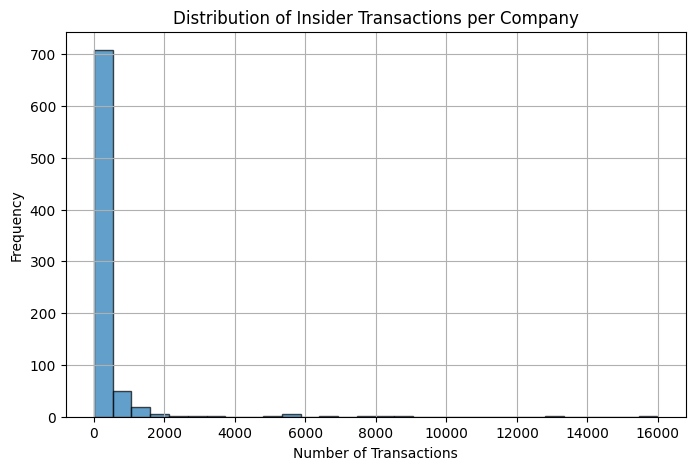

In [5]:
import matplotlib.pyplot as plt

# Count occurrences of each COMPANY_ID
company_counts = ndt["COMPANY_ID"].value_counts()

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(company_counts, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel("Number of Transactions")
plt.ylabel("Frequency")
plt.title("Distribution of Insider Transactions per Company")
# plt.yscale("log")  # Optional: log scale to better visualize distribution
plt.grid(True)

plt.show()

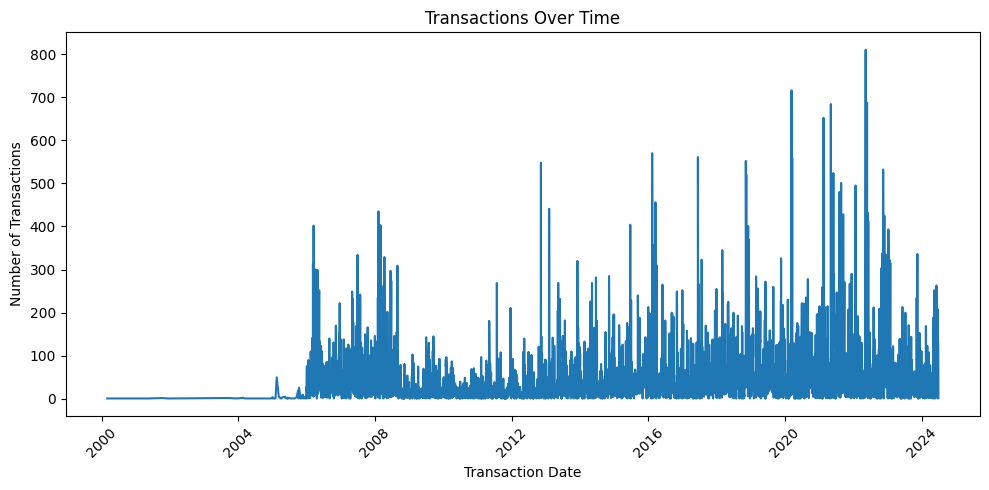

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the TRANS_DATE column to datetime
ndt['TRANS_DATE'] = pd.to_datetime(ndt['TRANS_DATE'])

# Count transactions for each date
transactions_over_time = ndt.groupby('TRANS_DATE').size()

# Plot the number of transactions over time
plt.figure(figsize=(10, 5))
plt.plot(transactions_over_time.index, transactions_over_time.values)
plt.xlabel('Transaction Date')
plt.ylabel('Number of Transactions')
plt.title('Transactions Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
count = ndt[(ndt["TRANS_SHARES"].notna()) & (ndt["SHRS_OWND_FOLWNG_TRANS"].isna())].shape[0]
print(count)

# Drop rows where SHRS_OWND_FOLWNG_TRANS is nan
ndt = ndt[~((ndt["TRANS_SHARES"].notna()) & (ndt["SHRS_OWND_FOLWNG_TRANS"].isna()))]
print(ndt.shape)


18
(255396, 13)


In [ ]:
filtered_ndt = ndt[
    [
        "COMPANY_ID",
        "TRANS_CODE",
        "TRANS_SHARES",
        "TRANS_PRICEPERSHARE",
        "SHRS_OWND_FOLWNG_TRANS",
        "DIRECT_INDIRECT_OWNERSHIP",
        "TRANS_DATE"
    ]
]

filtered_ndt["MONTH_END"] = pd.to_datetime(filtered_ndt["TRANS_DATE"]) + pd.offsets.MonthEnd(0)

# Filter only rows where TRANS_CODE is one of "P", "M", or "S"
filtered_ndt = filtered_ndt[filtered_ndt["TRANS_CODE"].isin(["P", "M", "S"])]
print(filtered_ndt.shape)


(201202, 8)


/var/folders/d2/h05xc7x1181fd8jxpltdv9v40000gn/T/ipykernel_23700/2181219624.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ndt["MONTH_END"] = pd.to_datetime(filtered_ndt["TRANS_DATE"]) + pd.offsets.MonthEnd(0)


In [13]:
filtered_ndt = filtered_ndt[pd.to_datetime(filtered_ndt["TRANS_DATE"]) > pd.Timestamp("2006-02-01")]
print(filtered_ndt.shape)

(200758, 8)


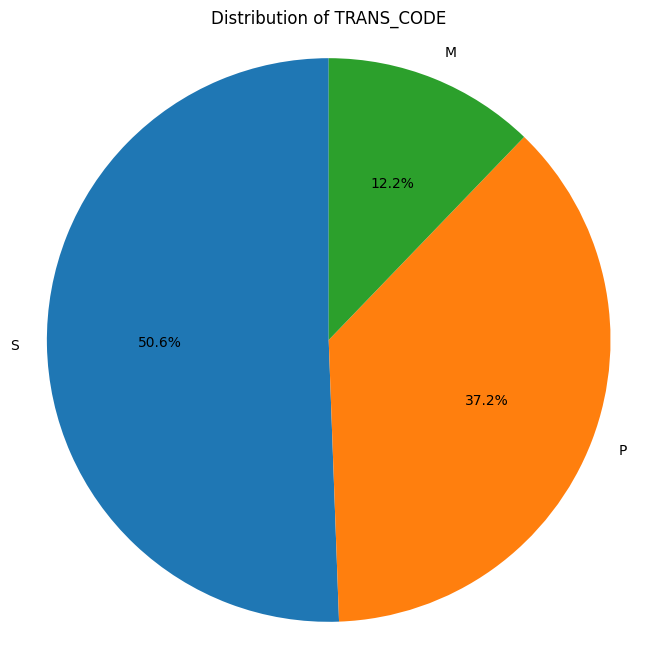

In [14]:
import matplotlib.pyplot as plt

# Count how many times each TRANS_CODE appears
trans_counts = filtered_ndt['TRANS_CODE'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(trans_counts, labels=trans_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of TRANS_CODE')
plt.axis('equal')  # This makes the pie chart a circle.
plt.show()

In [54]:
# Load datasets
RAW_DATA_DIR = os.path.abspath("../../data/raw")
closing_prices = pd.read_csv(os.path.join(RAW_DATA_DIR, "closing_prices.csv"))
print(closing_prices.head().to_markdown())

|    |   COMPANY_ID | PRICING_DATE   |   PRICE_CLOSE_USD |
|---:|-------------:|:---------------|------------------:|
|  0 |        21609 | 1968-01-31     |           4.18751 |
|  1 |        21609 | 1968-02-29     |           3.70834 |
|  2 |        21609 | 1968-03-29     |           3.77084 |
|  3 |        21609 | 1968-04-30     |           3.91668 |
|  4 |        21609 | 1968-05-31     |           3.83334 |


In [ ]:
cumulative_returns = []


In [56]:
ndt_with_returns = pd.merge(filtered_ndt, closing_prices, on=["COMPANY_ID", "MONTH_END"], how="left")

In [24]:
print(ndt_with_returns.head(1000).to_markdown())

|     |   COMPANY_ID | TRANS_CODE   |     TRANS_SHARES |   TRANS_PRICEPERSHARE |   SHRS_OWND_FOLWNG_TRANS | DIRECT_INDIRECT_OWNERSHIP   | TRANS_DATE   | MONTH_END           |    return_12m |
|----:|-------------:|:-------------|-----------------:|----------------------:|-------------------------:|:----------------------------|:-------------|:--------------------|--------------:|
|   0 |    367712111 | P            |  10000           |                  0.88 |              1e+07       | I                           | 2022-06-29   | 2022-06-30 00:00:00 |     5.78226   |
|   1 |    367712111 | P            |  10000           |                  0.88 |              2.5e+06     | I                           | 2022-06-29   | 2022-06-30 00:00:00 |     5.78226   |
|   2 |    367712111 | P            |  10000           |                  0.88 |              1.4943e+07  | I                           | 2022-06-29   | 2022-06-30 00:00:00 |     5.78226   |
|   3 |    367712111 | P            |  10000 

In [47]:
xbi_data = pd.read_csv(os.path.join(RAW_DATA_DIR, "xbi.csv"))

# Convert Date to datetime and sort the data
xbi_data["Date"] = pd.to_datetime(xbi_data["Date"], format="%m/%d/%Y")
xbi_data = xbi_data.sort_values("Date")

# Create reference dates for 6 and 12 months earlier
xbi_data["ref_date_6m"] = xbi_data["Date"] - pd.DateOffset(months=6)
xbi_data["ref_date_12m"] = xbi_data["Date"] - pd.DateOffset(months=12)

# Prepare helper DataFrames for merging. They use the daily dates.
df_6m = xbi_data[["Date", "Price"]].rename(columns={"Date": "ref_date", "Price": "price_6m"}).sort_values("ref_date")
merged_6m = pd.merge_asof(
    xbi_data.sort_values("ref_date_6m"),
    df_6m,
    left_on="ref_date_6m",
    right_on="ref_date",
    direction="backward"
)

df_12m = xbi_data[["Date", "Price"]].rename(columns={"Date": "ref_date", "Price": "price_12m"}).sort_values("ref_date")
merged_12m = pd.merge_asof(
    xbi_data.sort_values("ref_date_12m"),
    df_12m,
    left_on="ref_date_12m",
    right_on="ref_date",
    direction="backward"
)

# Bring the historical prices back to the main DataFrame
xbi_data["price_6m"] = merged_6m["price_6m"].values
xbi_data["price_12m"] = merged_12m["price_12m"].values

# Calculate returns: (current price - past price) / past price
xbi_data["return_6m"] = (xbi_data["Price"] - xbi_data["price_6m"]) / xbi_data["price_6m"]
xbi_data["return_12m"] = (xbi_data["Price"] - xbi_data["price_12m"]) / xbi_data["price_12m"]

# Inspect the first few rows
print(xbi_data.head(1000).to_markdown())

|      | Date                |   Price |   Open |   High |   Low | Vol.    | Change %   | ref_date_6m         | ref_date_12m        |   price_6m |   price_12m |    return_6m |    return_12m |
|-----:|:--------------------|--------:|-------:|-------:|------:|:--------|:-----------|:--------------------|:--------------------|-----------:|------------:|-------------:|--------------:|
| 4826 | 2006-02-07 00:00:00 |   16.37 |  16.47 |  16.52 | 16.37 | 16.50K  | -0.30%     | 2005-08-07 00:00:00 | 2005-02-07 00:00:00 |     nan    |      nan    | nan          | nan           |
| 4825 | 2006-02-08 00:00:00 |   16.36 |  16.34 |  16.36 | 16.27 | 1.50K   | -0.06%     | 2005-08-08 00:00:00 | 2005-02-08 00:00:00 |     nan    |      nan    | nan          | nan           |
| 4824 | 2006-02-09 00:00:00 |   16.51 |  16.55 |  16.72 | 16.51 | 36.30K  | 0.92%      | 2005-08-09 00:00:00 | 2005-02-09 00:00:00 |     nan    |      nan    | nan          | nan           |
| 4823 | 2006-02-10 00:00:00 |   16.56 |

In [51]:
# Ensure the Date column is in datetime format
xbi_data["Date"] = pd.to_datetime(xbi_data["Date"], format="%m/%d/%Y")

# Filter rows where the date is the month end and select required columns
filtered_xbi_data = xbi_data[xbi_data["Date"].dt.is_month_end][["Date", "return_6m", "return_12m"]]

# Rename the 'Date' column to 'Month End'
filtered_xbi_data = filtered_xbi_data.rename(columns={"Date": "MONTH_END", "return_12m_xbi": "return_12m", "return_6m_xbi": "return_6m"})

print(filtered_xbi_data.head(100).to_markdown())

|      | MONTH_END           |    return_6m |    return_12m |
|-----:|:--------------------|-------------:|--------------:|
| 4812 | 2006-02-28 00:00:00 | nan          | nan           |
| 4789 | 2006-03-31 00:00:00 | nan          | nan           |
| 4748 | 2006-05-31 00:00:00 | nan          | nan           |
| 4726 | 2006-06-30 00:00:00 | nan          | nan           |
| 4706 | 2006-07-31 00:00:00 | nan          | nan           |
| 4683 | 2006-08-31 00:00:00 |  -0.125282   | nan           |
| 4641 | 2006-10-31 00:00:00 |   0.0608914  | nan           |
| 4620 | 2006-11-30 00:00:00 |   0.13707    | nan           |
| 4580 | 2007-01-31 00:00:00 |   0.0627085  | nan           |
| 4561 | 2007-02-28 00:00:00 |   0.0503597  |  -0.0936795   |
| 4519 | 2007-04-30 00:00:00 |   0.04038    |   0.0998117   |
| 4497 | 2007-05-31 00:00:00 |   0.064133   |   0.196262    |
| 4455 | 2007-07-31 00:00:00 |   0.0527307  |   0.118746    |
| 4432 | 2007-08-31 00:00:00 |   0.155666   |   0.197419    |
| 4390 |

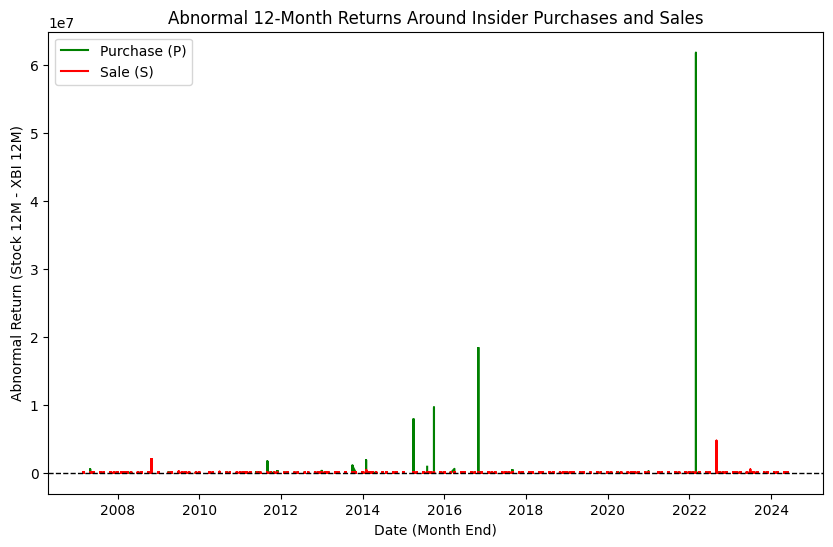

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Rename XBI's 12-month return so it won't clash
#    (assuming 'filtered_xbi_data' has columns ['Month End', 'return_6m', 'return_12m'])
xbi_for_merge = filtered_xbi_data.rename(
    columns={"Month End": "MONTH_END", "return_12m": "return_12m_xbi"}
)

# 2. Merge XBI returns into the insider trades DataFrame on the common MONTH_END column
ndt_with_returns = pd.merge(
    ndt_with_returns,
    xbi_for_merge[["MONTH_END", "return_12m_xbi"]],
    on="MONTH_END",
    how="left"
)

# 3. Calculate the "abnormal return" as the difference between the stock's return_12m and XBI's return_12m
ndt_with_returns["abnormal_return_12m"] = (
    ndt_with_returns["return_12m"] - ndt_with_returns["return_12m_xbi"]
)

# 4. Split the data by transaction code (P for purchase, S for sale)
purchase_data = ndt_with_returns[ndt_with_returns["TRANS_CODE"] == "P"].copy()
sale_data = ndt_with_returns[ndt_with_returns["TRANS_CODE"] == "S"].copy()

# 5. Sort each subset by MONTH_END (for a proper time-series line plot)
purchase_data.sort_values("MONTH_END", inplace=True)
sale_data.sort_values("MONTH_END", inplace=True)

# 6. Plot the two lines on the same figure
plt.figure(figsize=(10, 6))

# Plot "Purchase" abnormal returns
plt.plot(
    purchase_data["MONTH_END"],
    purchase_data["abnormal_return_12m"],
    label="Purchase (P)",
    color="green"
)

# Plot "Sale" abnormal returns
plt.plot(
    sale_data["MONTH_END"],
    sale_data["abnormal_return_12m"],
    label="Sale (S)",
    color="red"
)

plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
plt.title("Abnormal 12-Month Returns Around Insider Purchases and Sales")
plt.xlabel("Date (Month End)")
plt.ylabel("Abnormal Return (Stock 12M - XBI 12M)")
plt.legend()
plt.show()